# Алюминий в тополях

Для 13 разновидностей тополей, растущих в зоне интенсивного загрязнения, в
августе и ноябре измерялась средняя концентрация алюминия в микрограммах на
грамм древесины.

In [7]:
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as st
import seaborn as sns
import pandas as pd

In [8]:
# критерий знаков
from statsmodels.stats.descriptivestats import sign_test

# перестановочный критерий
from permute.core import one_sample

# бутстрап
from arch.bootstrap import IIDBootstrap

In [9]:
al = pd.read_csv('./poplar.txt', delimiter='\t')
al.head()

,Clone,August,November
0,Columbia River,18.3,12.7
1,Fritzi Pauley,13.3,11.1
2,Hazendans,16.5,15.3
3,Primo,12.6,12.7
4,Raspalje,9.5,10.5


Text(0, 0.5, 'August')

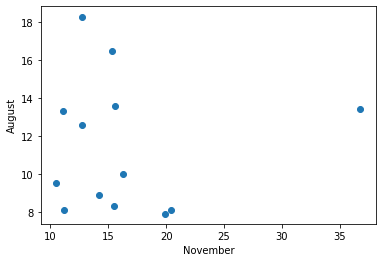

In [10]:
plt.scatter(al['November'].values, al['August'].values)
plt.xlabel('November')
plt.ylabel('August')

In [11]:
delta = al['August']-al['November']

q-q график

In [18]:
st.shapiro(delta)

(0.9266656637191772, 0.3080523610115051)

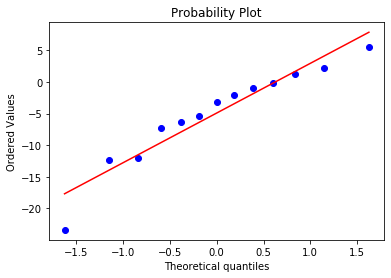

In [14]:
_= st.probplot(delta , plot = plt)

Критерий знаков:

In [15]:
sign_test(delta)

(-3.5, 0.09228515625000003)

In [16]:
st.wilcoxon(delta)

WilcoxonResult(statistic=16.0, pvalue=0.03924327615032667)

In [17]:
one_sample(al['November'], al['August'],  alternative='two-sided')

ValueError: high is out of bounds for int32

Поменяем статистику (вместо ```mean``` поставим ```t```):

In [ ]:
# ваш код

Ожидаемый ответ: ```0.03```

Доверительный интервал для средней разности с помощью бутстрепа:

In [19]:
from arch.bootstrap import IIDBootstrap
bs = IIDBootstrap(delta)
bs.conf_int(np.mean, 1000, method='basic')

array([[-8.65403846],
       [-0.69961538]])

Доверительный интервал методом 'bca':

In [20]:
bs = IIDBootstrap(delta)
bs.conf_int(np.mean, 1000, method='bca')

array([[-9.83449842],
       [-1.69007746]])

Зависимость устойчивости доверительного интервала от количества попыток сэмплирования (проверить для n<20000)

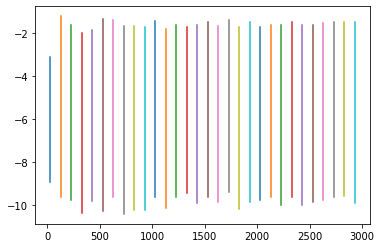

In [31]:
a = []
for i  in range(30,3000,100):
    bs = IIDBootstrap(delta)
    res = bs.conf_int(np.mean, i, method='bca')
    plt.plot([i , i] , res)

Зависимость доверительного интервала от уровня доверия:

In [ ]:
# ваш код

**Laureysens I., Blust R., De Temmerman L., Lemmens C., Ceulemans R. (2004). Clonal variation in heavy metal accumulation and biomass production in a poplar coppice culture. I. Seasonal variation in leaf, wood and bark concentrations. Environmental Pollution, 131, 485-494.**